# Accuracy, Confusion Matrix, Precision, Recall, F1 score, AUC & ROC

Confusion matrices are the result of classification problems. There are four possible values that make up the result: True Positive, False Negative, False Positive, and True Negative.

![](cm1.png)

- True Positive — these are cases in which the classification model created correctly predicted positive.
- False Negative — these are cases in which the classification model predicted false, but are actually positive. These are also considered Type II errors.
- False Positive — these are the cases in which the classification model predicted positive, but are actually negative. These are also considered Type I errors.
- True Negative — these are the cases in which the classification model correctly predicted negative.

-------------------------------------------------

- Sensitivity  (Recall) — also known as the True Positive Rate or Recall. Outcomes that are correctly predicted as positive.
- Specificity — also known as the True Negative Rate. Outcomes that are correctly predicted as negative.
- Accuracy — Outcomes that are correctly labeled at true. it's not compulsory that a good result. Many times data imbalanced problem. Than we use Precision and Recall.
- Negative Predictive Value — Outcomes that are correctly labeled as false.
- Precision — Outcomes that are correctly predicted positive.

When use Precision and Recall?
 - If the negative samples are important, we should focus on precision. Otherwise, we should focus on recall.

- However, as to F1-score, the value higher, the model is better.

![](cm2.png)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('hotel_booking.csv')

In [5]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
11420,Resort Hotel,1,86,2017,May,18,6,4,6,2,...,Transient,155.0,0,1,Canceled,2017-02-11,Charles Holmes,Charles_Holmes50@hotmail.com,632-328-6363,************1022


In [6]:
df.shape

(119390, 36)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
# Deleting unuseful columns
df = df.drop(['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','name', 'email','phone-number', 'credit_card'],axis=1)

In [9]:
df.shape

(119390, 26)

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special

In [11]:
df = df.bfill().ffill()

In [12]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
deposit_type                       object
agent                             float64
company                           float64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [13]:
l = []
for i in df.columns:
    if df[i].dtypes =='O':
        l.append(i)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in l:
    df[i] = le.fit_transform(df[i])

In [15]:
# df.dtypes

In [16]:
x = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
dt_pre = dt.predict(x_test)

In [19]:
data = pd.DataFrame({'Actual Value':y_test,'Predicted Value':dt_pre})

In [20]:
data

,Actual Value,Predicted Value
247,1,1
81798,1,1
114200,0,0
110394,0,0
33450,0,0
...,...,...
60337,1,1
13293,1,1
50184,1,1
43940,1,1


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pre)

0.9377669821593099

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_test,dt_pre)
print(cf_matrix)
print(classification_report(y_test,dt_pre))

[[14351   764]
 [  722  8041]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15115
           1       0.91      0.92      0.92      8763

    accuracy                           0.94     23878
   macro avg       0.93      0.93      0.93     23878
weighted avg       0.94      0.94      0.94     23878



<AxesSubplot:>

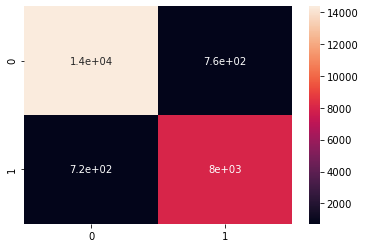

In [23]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<IPython.core.display.Javascript object>

<AxesSubplot:>

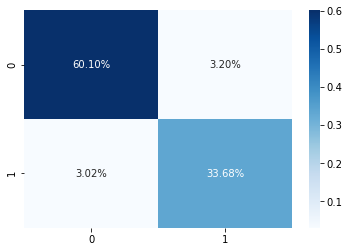

In [24]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [25]:
# non-binary classifier (3x3 in this case)

# make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False)

In [26]:
confusion = confusion_matrix(y_test, dt_pre)
confusion.ravel() 

array([14351,   764,   722,  8041], dtype=int64)

In [27]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_test, dt_pre, pos_label=1)
precision_negative = precision_score(y_test, dt_pre, pos_label=0)

precision_positive, precision_negative

(0.9132311186825667, 0.9520997810654813)

In [28]:
from sklearn.metrics import recall_score
recall_sensitivity = recall_score(y_test, dt_pre, pos_label=1)
recall_specificity = recall_score(y_test, dt_pre, pos_label=0)

recall_sensitivity, recall_specificity 

(0.9176081250713226, 0.9494541845848495)

In [29]:
from sklearn.metrics import f1_score
f1_positive = f1_score(y_test, dt_pre, pos_label=1)
f1_negative = f1_score(y_test, dt_pre, pos_label=0)

f1_positive, f1_negative 

(0.9154143897996357, 0.9507751424407049)

In [30]:
from sklearn.metrics import log_loss
log_loss(y_test,dt_pre)

2.149477871483121

## AUC ROC Curve

Setting different thresholds for classifying positive class for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.

![](data-1.png)

The metrics change with the changing threshold values. We can generate different confusion matrices and compare the various metrics that we discussed in the previous section. But that would not be a prudent thing to do. Instead, what we can do is generate a plot between some of these metrics so that we can easily visualize which threshold is giving us a better result.

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.
- When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
- When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In [31]:
# AUC ROC Curve

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
x, y = make_classification(n_samples=1000,n_classes=2,n_features=20,random_state=24)

# split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=24)

# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:, 1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:, 1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:, 1])

print(auc_score1, auc_score2)

print(auc_score1, auc_score2)

print(auc_score1, auc_score2)

0.958249966653328 0.970432617491441
0.958249966653328 0.970432617491441
0.958249966653328 0.970432617491441


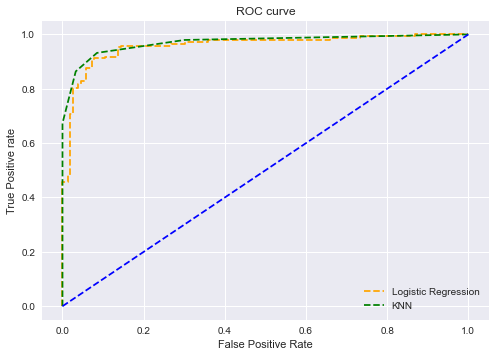

In [32]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

![](cm12.jpg)

![](cm11.jpg)

![](cm3.jpg)

![](cm4.jpg)

![](cm5.jpg)

![](cm6.jpg)

![](cm7.jpg)

![](cm8.jpg)

![](cm9.jpg)

![](cm10.jpg)

![](cm13.jpg)

![](cm14.jpg)

![](cm15.jpg)

![](cm16.jpg)

![](cm17.jpg)

![](cm18.jpg)

![](cm19.jpg)

![](cm20.jpg)

![](cm21.jpg)

![](cm22.jpg)

![](cm23.jpg)

![](cm24.jpg)

![](cm25.jpg)

![](cm26.jpg)

![](cm27.jpg)

![](cm26.jpg)